In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np


In [2]:
#Change to data directory where district shapefiles and block shapefiles stored
data="C:/Users/Neil/Dropbox/pork spending/"

In [3]:
#cd1=cd114_paoh[(cd114_paoh['CD114FP']=='12')  & (cd114_paoh['STATEFP']=='42')].boundary.iloc[0]
#closest_coords(polygon=cd1,point=PA_bgcentroids.iloc[0])
#PA_bg['cp1_x']=
#print(PA_bg.crs)
#cols=['CD1','CD2','CD3','CD4','CD5','CD6','CD7','CD8','CD9','CD10','CD11','CD12','CD13','CD14','CD15','CD16','CD17','CD18']
stfips_map={
    'AL' : '01',
    'AK' : '02',
    'AZ' : '04',
    'AR' : '05',
    'CA' : '06',
    'CO' : '08',
    'CT' : '09',
    'DE' : '10',
    'FL' : '12',
    'GA' : '13',
    'HI' : '15',
    'ID' : '16',
    'IL' : '17',
    'IN' : '18',
    'IA' : '19',
    'KS' : '20',
    'KY' : '21',
    'LA' : '22',
    'ME' : '23',
    'MD' : '24',
    'MA' : '25',
    'MI' : '26',
    'MN' : '27',
    'MS' : '28',
    'MO' : '29',
    'MT' : '30',
    'NE' : '31',
    'NV' : '32',
    'NH' : '33',
    'NJ' : '34',
    'NM' : '35',
    'NY' : '36',
    'NC' : '37',
    'ND' : '38',
    'OH' : '39',
    'OK' : '40',
    'OR' : '41',
    'PA' : '42',
    'RI' : '44',
    'SC' : '45',
    'SD' : '46',
    'TN' : '47',
    'TX' : '48',
    'UT' : '49',
    'VT' : '50',
    'VA' : '51',
    'WA' : '53',
    'WV' : '54',
    'WI' : '55',
    'WY' : '56',
    'AS' : '60',
    'GU' : '66',
    'MP' : '69',
    'PR' : '72',
    'VI' : '78'
}

stnamefipsmap={
    "Alabama" : "01",
    "Alaska" : "02",
    "Arizona" : "04",
    "Arkansas" : "05",
    "California" : "06",
    "Colorado" : "08",
    "Connecticut" : "09",
    "Delaware" : "10",
    "Florida" : "12",
    "Georgia" : "13",
    "Hawaii" : "15",
    "Idaho" : "16",
    "Illinois" : "17",
    "Indiana" : "18",
    "Iowa" : "19",
    "Kansas" : "20",
    "Kentucky" : "21",
    "Louisiana" : "22",
    "Maine" : "23",
    "Maryland" : "24",
    "Massachusetts" : "25",
    "Michigan" : "26",
    "Minnesota" : "27",
    "Mississippi" : "28",
    "Missouri" : "29",
    "Montana" : "30",
    "Nebraska" : "31",
    "Nevada" : "32",
    "New Hampshire" : "33",
    "New Jersey" : "34",
    "New Mexico" : "35",
    "New York" : "36",
    "North Carolina" : "37",
    "North Dakota" : "38",
    "Ohio" : "39",
    "Oklahoma" : "40",
    "Oregon" : "41",
    "Pennsylvania" : "42",
    "Rhode Island" : "44",
    "South Carolina" : "45",
    "South Dakota" : "46",
    "Tennessee" : "47",
    "Texas" : "48",
    "Utah" : "49",
    'Vermont' : "50",
    "Virginia" : "51",
    "Washington" : "53",
    "West Virginia" : "54",
    "Wisconsin" : "55",
    "Wyoming" : "56"
              }


Some districts include large bodies of water. Notably Michigan's districts include the great lakes in the cd113 adn cd114 maps

In [4]:
#Block groups
blockgroupdir=data+"/census_block_groups"
nonstates = ['AS','GU' ,'MP' ,'PR' ,'VI' ]

empty_df=pd.DataFrame({'STATEFP':[],'geometry':[]})
dissolved_bgs=gpd.GeoDataFrame(empty_df)
for state in stfips_map:
    if state in nonstates:
        continue
    blockgroups=gpd.read_file(blockgroupdir+"/cb_2018_"+stfips_map[state]+"_bg_500k/cb_2018_"+stfips_map[state]+"_bg_500k.shp")
    blockgroups=blockgroups[['STATEFP', 'geometry']]
    dissolve=blockgroups.dissolve(by='STATEFP')
    dissolved_bgs=dissolved_bgs.geometry.append(dissolve.geometry) #multidimential list
    dissolved_gdf=gpd.GeoDataFrame(dissolved_bgs) #turns into GeoDataFrame
    #Create columns from STATEFP which is the index of the series created from dissolve
    dissolved_gdf.index.name = 'STATEFP' 
    dissolved_gdf.reset_index(inplace=True) 
    #set Geomtry for GeoDataFrame
    dissolved_gdf=dissolved_gdf.rename(columns={0:'geometry'}) 
    dissolved_gdf.set_geometry('geometry')

#dissolved_bgs=pd.DataFrame(dissolved_bgs, columns=['STATEFP','geometry'])
#dissolved_bgs=gpd.GeoDataFrame(dissolved_bgs, geometry='geometry')

In [5]:
lower48=(dissolved_gdf['STATEFP']!=stfips_map['AK']) & (dissolved_gdf['STATEFP']!=stfips_map['HI'])
dissolved_gdf[lower48].plot()


In [6]:
distmap=gpd.read_file(data + "/national congressial district shapefiles/tl_2010_us_cd111/tl_2010_us_cd111.shp")


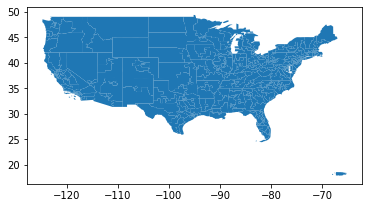

In [7]:
lower48_dists=(distmap['STATEFP10']!=stfips_map['AK']) & (distmap['STATEFP10']!=stfips_map['HI'])
distmap[lower48_dists].plot()

In [8]:
distmap_trim = gpd.overlay(dissolved_gdf, distmap, how='intersection')

In [9]:
#print(dissolved_gdf.columns.values)
#print(distmap.columns.values)
#print(distmap_trim[distmap_trim.STATEFP=='12'].shape)
distmap_trim[distmap_trim.STATEFP10=='01'].head()
#print(distmap_trim[distmap_trim.STATEFP==distmap_trim.STATEFP10].head())
#print(distmap_trim[distmap_trim.STATEFP==distmap_trim.STATEFP10].shape)

,STATEFP,STATEFP10,STATENS10,CD111FP,GEOID10,NAMELSAD10,LSAD10,CDSESSN,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
5,01,01,01779775,01,0101,Congressional District 1,C2,111,G5200,N,16328134688,2276021380,+31.0329326,-087.7905809,"MULTIPOLYGON (((-88.24104 30.37529, -88.26069 ..."
6,12,01,01779775,01,0101,Congressional District 1,C2,111,G5200,N,16328134688,2276021380,+31.0329326,-087.7905809,"MULTIPOLYGON (((-86.70626 30.99470, -86.68831 ..."
7,28,01,01779775,01,0101,Congressional District 1,C2,111,G5200,N,16328134688,2276021380,+31.0329326,-087.7905809,"MULTIPOLYGON (((-88.39415 30.35249, -88.39075 ..."
11,01,01,01779775,02,0102,Congressional District 2,C2,111,G5200,N,27152808010,321343075,+31.7458624,-086.0692524,"POLYGON ((-85.05603 32.06305, -85.05609 32.062..."
12,12,01,01779775,02,0102,Congressional District 2,C2,111,G5200,N,27152808010,321343075,+31.7458624,-086.0692524,"MULTIPOLYGON (((-85.02524 31.00068, -85.02411 ..."


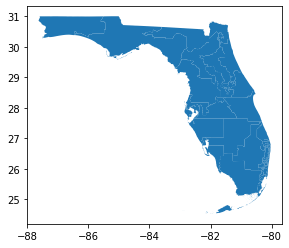

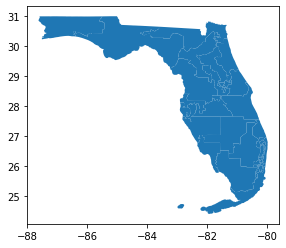

In [10]:
compare_st='FL'
distmap_trim[distmap_trim['STATEFP10']==stfips_map[compare_st]].plot()
distmap[distmap['STATEFP10']==stfips_map[compare_st]].plot()


In [11]:
distmap_trim.crs=distmap.crs
distmap_trim.to_file(data + 'test_shapes/test.shp', driver='ESRI Shapefile')

### Go through each district map (cd105 through cd114) and trim. 
#### Save in trimmed_cd_shapefiles

In [12]:
stname_fips=pd.DataFrame(list(stnamefipsmap.items()), columns=['stname','STATEFP'])
                              

#for congress in ['cd105','cd106','cd107','cd108','cd109','cd110','cd111',
#                 'cd112', 'cd113', 'cd114']:
for congress in ['cd110']:
    
    if congress=="cd105":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/districts105/districtShapes/districts105.shp")
        distmap=distmap.rename(columns={'DISTRICT':'dist'})
        print(distmap.shape)
        distmap=distmap.merge(stname_fips,left_on='STATENAME',right_on='stname', how='left')
        print(distmap.shape)

    elif congress=="cd106":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/districts106/districtShapes/districts106.shp")
        distmap=distmap.rename(columns={'DISTRICT':'dist'})
        print(distmap.shape)
        distmap=distmap.merge(stname_fips,left_on='STATENAME',right_on='stname', how='left')
        print(distmap.shape)
        
    elif congress=="cd107":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/districts107/districtShapes/districts107.shp")
        distmap=distmap.rename(columns={'DISTRICT':'dist'})
        print(distmap.shape)
        distmap=distmap.merge(stname_fips,left_on='STATENAME',right_on='stname', how='left')
        print(distmap.shape)
        
    elif congress=="cd108":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/districts108/districtShapes/districts108.shp")
        distmap=distmap.rename(columns={'DISTRICT':'dist'})
        print(distmap.shape)
        distmap=distmap.merge(stname_fips,left_on='STATENAME',right_on='stname', how='left')
        print(distmap.shape)
        
    elif congress=="cd109":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/districts109/districtShapes/districts109.shp")
        distmap=distmap.rename(columns={'DISTRICT':'dist'})
        print(distmap.shape)
        distmap=distmap.merge(stname_fips,left_on='STATENAME',right_on='stname', how='left')
        print(distmap.shape)
        
    elif congress=="cd110":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/districts110/districtShapes/districts110.shp")
        distmap=distmap.rename(columns={'DISTRICT':'dist'})
        print(distmap.shape)
        distmap=distmap.merge(stname_fips,left_on='STATENAME',right_on='stname', how='left')
        print(distmap.shape)
        
    elif congress=="cd111":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/tl_2010_us_cd111/tl_2010_us_cd111.shp")
        distmap=distmap.rename(columns={'CD111FP':'dist', 'STATEFP10':'STATEFP'})
        
    elif congress=="cd112":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/tl_2011_us_cd112/tl_2011_us_cd112.shp")
        distmap=distmap.rename(columns={'CD112FP':'dist'})
    
    elif congress=="cd113":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/tl_2013_us_cd113/tl_2013_us_cd113.shp")
        distmap=distmap.rename(columns={'CD113FP':'dist'})
    
    elif congress=="cd114":
        distmap=gpd.read_file(data + "/national congressial district shapefiles/tl_2015_us_cd114/tl_2015_us_cd114.shp")
        distmap=distmap.rename(columns={'CD114FP':'dist'})
        
    
    distmap_trim = gpd.overlay(dissolved_gdf, distmap, how='intersection')
    distmap_trim.crs=distmap.crs
    print(distmap_trim.columns.values)
    distmap_trim=distmap_trim[distmap_trim['STATEFP_1']==distmap_trim['STATEFP_2']] # Get rid of extra records for borders which share states. Borders will still exist.
    distmap_trim.to_file(data + 'trimmed_cd_shapefiles/'+ congress +'.shp', driver='ESRI Shapefile')

(436, 16)
(436, 18)


TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.